In [146]:
#Generic DataScience Requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
from scipy.stats import norm
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
from scipy import stats as ss

#Transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split

#Classifiers
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

#Performance Measuring Tools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Data Visualization and Cleaning

In [147]:
# Read data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [148]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [149]:
#Training data information

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are 38 numeric data types and 43 are objects. Let us split the data into 2 groups.¶

In [150]:
#Save the 'Id' column as we need to drop it since it is not required for prediction model.

train_Id = train['Id']
test_Id = test['Id']

In [151]:
# Drop the 'Id' column.

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [152]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


In [153]:
print (train.columns)
print (train.shape)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

mu = 180921.20 
sigma = 79415.29
Skewness = 1.88
Kurtosis = 6.54


C:\Users\Jianglan\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


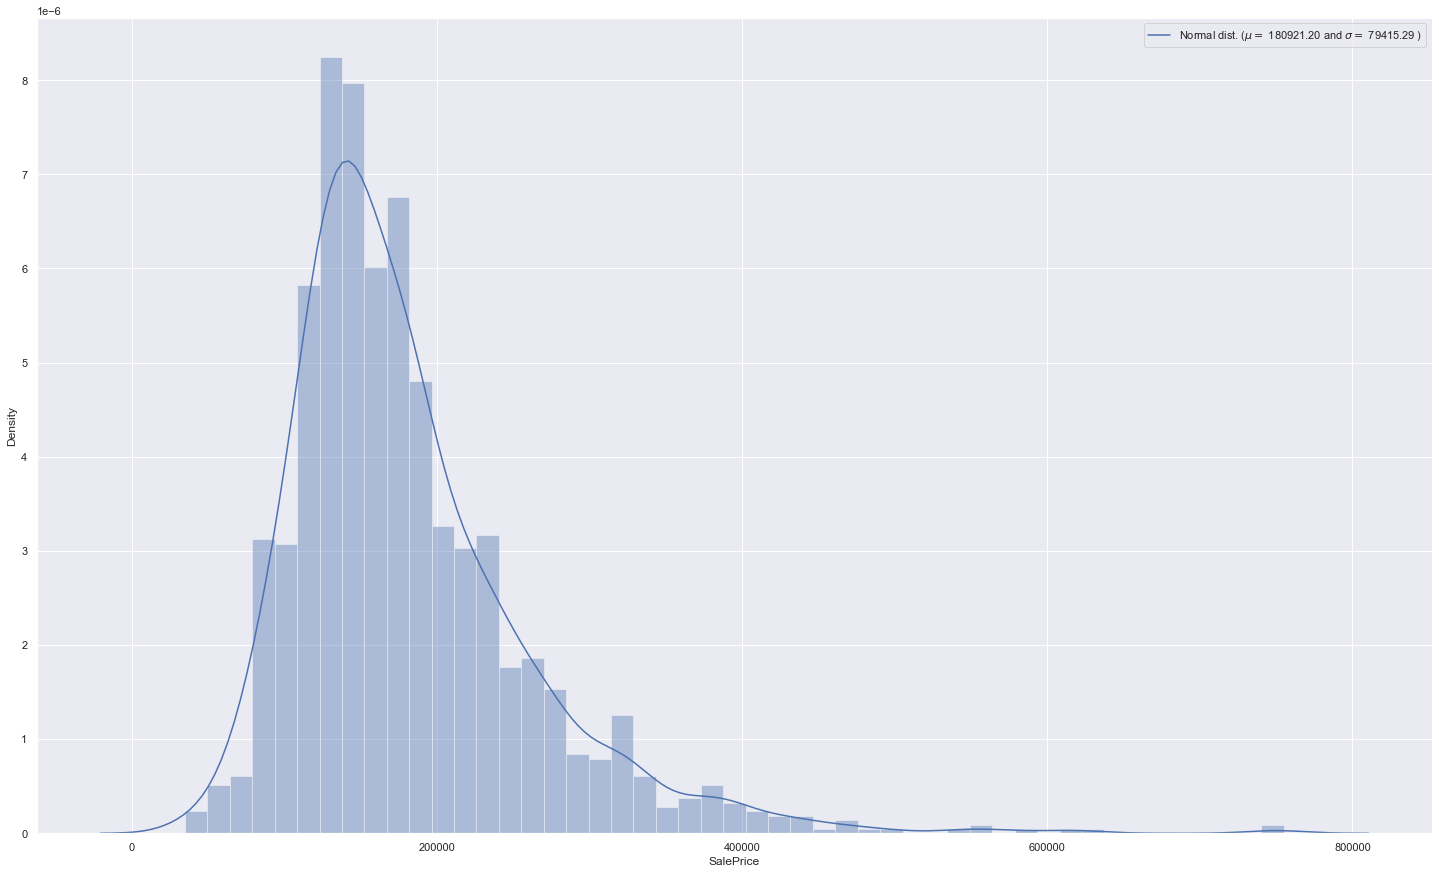

In [154]:
# Distribution of Sale Price:

# Linear models work on the assumption that the distribution of the independent variable and the target variable are 
# similar. Therefore, knowing about the skewness of data helps us in creating better linear models

#train['SalePrice'].describe()
fig = plt.figure(figsize=(25,15))
plt.subplot(1,1,1)
sns.distplot(train['SalePrice']);
(mu, sigma) = norm.fit(train['SalePrice'])
print( 'mu = {:.2f} \nsigma = {:.2f}'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')

## Skewness and Kurtosis of the data
print('Skewness = {:.2f}'.format(train['SalePrice'].skew()))
print('Kurtosis = {:.2f}'.format(train['SalePrice'].kurt()))

In [155]:
# Our data is positively skewed here, which means that it has a higher number of data points having low values, 
# i.e., more houses with less price. So when we train our model on this data, it will perform better at predicting 
# the price of homes with lower price when compared to those with higher price.

# Also, skewness tells us about the direction of outliers. We can see from above that our distribution is positively 
# skewed and most of the outliers are present on the right side of the distribution.

C:\Users\Jianglan\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mu = 12.02 
sigma = 0.40
Skewness = 0.12
Kurtosis = 0.81


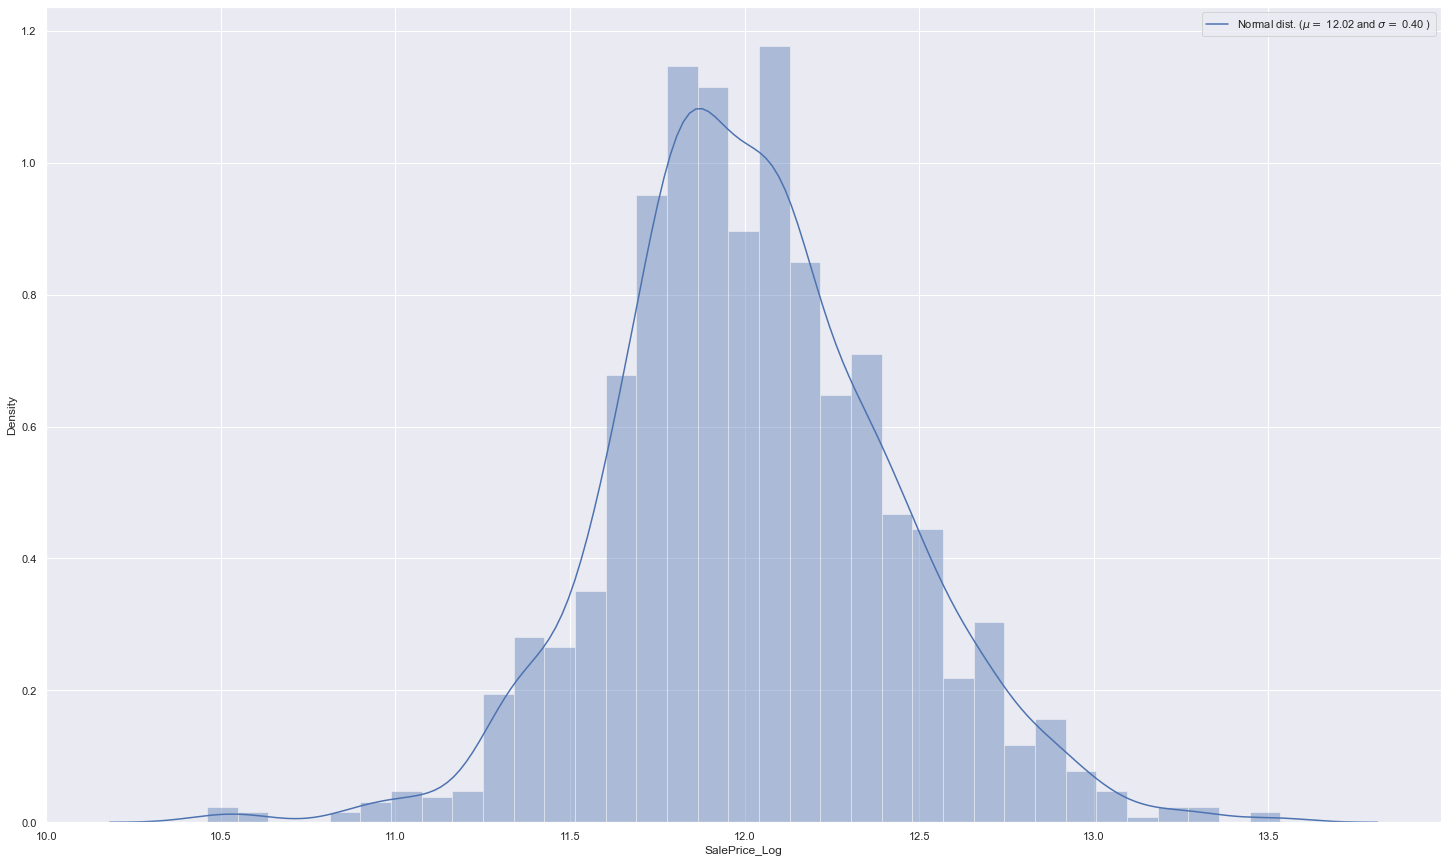

In [156]:
## Fitting log curve to check the distribution with Log Transfornation

train['SalePrice_Log'] = np.log(train['SalePrice'])

## Log Transformed Curve
fig = plt.figure(figsize=(25,15))
plt.subplot(1,1,1)
sns.distplot(train['SalePrice_Log'])
(mu, sigma) = norm.fit(train['SalePrice_Log'])
print( 'mu = {:.2f} \nsigma = {:.2f}'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')

## Skewness and Kurtosis of the data
print('Skewness = {:.2f}'.format(train['SalePrice_Log'].skew()))
print('Kurtosis = {:.2f}'.format(train['SalePrice_Log'].kurt()))

In [157]:
## Now the data is normally distributed and moderatly skewed, thus making it suitable for developing linear model.

In [158]:
# Separate the numerical features and categorical features
category_features = train.select_dtypes(include = ["object"]).columns
feat_cat = train[category_features]
print("Total No. of Categorical features are: " + str(len(category_features)))
print(category_features)


print("*"*100)


numerical_features = train.select_dtypes(exclude = ["object"]).columns
feat_num = train[numerical_features]
print("Total No. of Numerical features : " + str(len(numerical_features)))
print(numerical_features)


Total No. of Categorical features are: 43
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
****************************************************************************************************
Total No. of Numerical features : 38
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',


In [159]:
# Missing data in training data

train_na = train.isnull().sum()
train_na = train_na[train_na > 0]
train_na.sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [160]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
train_update0 = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
train_update0.head(20)

,Total,Percent
PoolQC,1453,1.00
MiscFeature,1406,0.96
Alley,1369,0.94
Fence,1179,0.81
FireplaceQu,690,0.47
LotFrontage,259,0.18
GarageYrBlt,81,0.06
GarageType,81,0.06
GarageQual,81,0.06
GarageCond,81,0.06


In [161]:
# In the missing data there are 19 features with NaN values, of which 3 are numerical types and 16 are Strings.
# Let us replace the Strings NaN with None and the 3 floating types with the Median value.

In [162]:
# First replace Nan in category

feat_cat.head(10)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [163]:
# 16 String features:
## PoolQC	 Pool quality
## MiscFeature	 Miscellaneous feature not covered in other categories
## Alley	 Type of alley access
## Fence	 Fence quality
## FireplaceQu	 Fireplace quality

## BsmtFinType2	 Quality of second finished area (if present)
## BsmtExposure	 Walkout or garden level basement walls
## BsmtFinType1	 Quality of basement finished area
## BsmtCond	 General condition of the basement
## BsmtQual	 Height of the basement
## MasVnrType	 Masonry veneer type
## Electrical	 Electrical system

## GarageType	 Garage location
## GarageFinish	 Interior finish of the garage
## GarageQual	 Garage quality
## GarageCond	 Garage condition
# It is quite possible that Garage does not exist for these houses, therefore we will replace this value with None.


In [164]:
for cat in list(feat_cat):
    print(feat_cat[cat].value_counts())
    print('#'*50)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
##################################################
Pave    1454
Grvl       6
Name: Street, dtype: int64
##################################################
Grvl    50
Pave    41
Name: Alley, dtype: int64
##################################################
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
##################################################
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
##################################################
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
##################################################
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
##################################################
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
############################################

In [165]:
## Filling the Missing Values where  NAN has meaning ex.
## This information can be found from the Data Discription



fill_na = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual'
, 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical']

## Replace 'NaN' with 'None' in these columns


for cols in fill_na:
    train[cols].fillna('None',inplace = True)

In [166]:


# Check if any other Nan value in Categorical

total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)
train_update1 = pd.concat([total,percent],axis = 1, keys = ["Total","Percent"])
train_update1.head(10)



,Total,Percent
LotFrontage,259,0.18
GarageYrBlt,81,0.06
MasVnrArea,8,0.01
BsmtQual,0,0.00
RoofMatl,0,0.00
Exterior1st,0,0.00
Exterior2nd,0,0.00
MasVnrType,0,0.00
ExterQual,0,0.00
ExterCond,0,0.00


In [167]:
feat_num.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_Log
0,60,65.00,8450,7,5,2003,2003,196.00,706,0,...,61,0,0,0,0,0,2,2008,208500,12.25
1,20,80.00,9600,6,8,1976,1976,0.00,978,0,...,0,0,0,0,0,0,5,2007,181500,12.11
2,60,68.00,11250,7,5,2001,2002,162.00,486,0,...,42,0,0,0,0,0,9,2008,223500,12.32
3,70,60.00,9550,7,5,1915,1970,0.00,216,0,...,35,272,0,0,0,0,2,2006,140000,11.85
4,60,84.00,14260,8,5,2000,2000,350.00,655,0,...,84,0,0,0,0,0,12,2008,250000,12.43
5,50,85.00,14115,5,5,1993,1995,0.00,732,0,...,30,0,320,0,0,700,10,2009,143000,11.87
6,20,75.00,10084,8,5,2004,2005,186.00,1369,0,...,57,0,0,0,0,0,8,2007,307000,12.63
7,60,nan,10382,7,6,1973,1973,240.00,859,32,...,204,228,0,0,0,350,11,2009,200000,12.21
8,50,51.00,6120,7,5,1931,1950,0.00,0,0,...,0,205,0,0,0,0,4,2008,129900,11.77
9,190,50.00,7420,5,6,1939,1950,0.00,851,0,...,4,0,0,0,0,0,1,2008,118000,11.68


In [168]:
for cat in list(feat_num):
    print(feat_num[cat].value_counts())
    print('#'*50)

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
##################################################
60.00     143
70.00      70
80.00      69
50.00      57
75.00      53
         ... 
106.00      1
38.00       1
138.00      1
140.00      1
137.00      1
Name: LotFrontage, Length: 110, dtype: int64
##################################################
7200     25
9600     24
6000     17
10800    14
9000     14
         ..
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64
##################################################
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
##################################################
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallC

In [169]:


# 3 Numerical features:

## LotFrontage	 Linear feet of street connected to property: There should a street connected to the property,
#therefore we will use the median value 


## MasVnrArea	 Masonry veneer area in square feet
# Let us replace this with the Median value 


## GarageYrBlt	 Year garage was built
# It is quite possible that Garage does not exist for these houses, therefore we replace it with Zero



In [170]:
train.fillna(train.median(), inplace = True)

In [171]:
# Check for missing data in training data

print("Missing Status of the Training data:",train.isnull().sum().sum())

Missing Status of the Training data: 0


In [172]:


# No data is now missing



In [173]:
# Separate the numerical features and categorical features
category_features1 = train.select_dtypes(include = ["object"]).columns
feat_cat1 = train[category_features1]
print("Total No. of Categorical features are: " + str(len(category_features1)))
print(category_features1)


print("*"*100)


numerical_features1 = train.select_dtypes(exclude = ["object"]).columns
feat_num1 = train[numerical_features1]
print("Total No. of Numerical features : " + str(len(numerical_features1)))
print(numerical_features1)

Total No. of Categorical features are: 43
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
****************************************************************************************************
Total No. of Numerical features : 38
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',


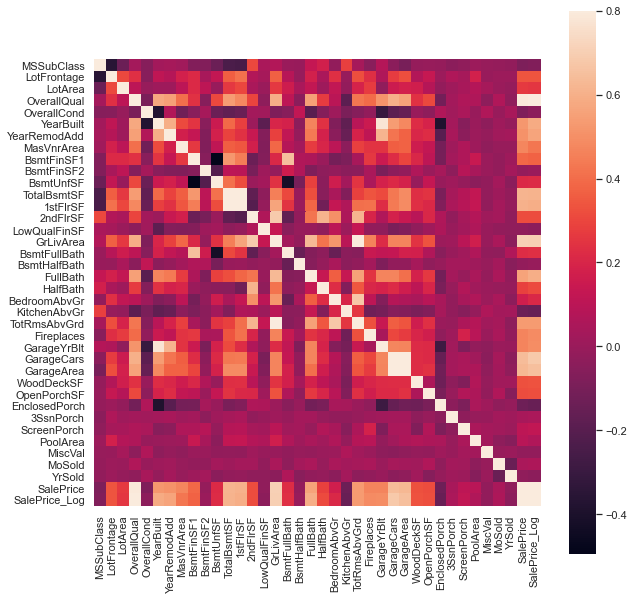

In [174]:
#correlation matrix
corr = train.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, vmax=0.8, square=True);

In [175]:
corr['SalePrice_Log'].sort_values(ascending=False)

SalePrice_Log    1.00
SalePrice        0.95
OverallQual      0.82
GrLivArea        0.70
GarageCars       0.68
GarageArea       0.65
TotalBsmtSF      0.61
1stFlrSF         0.60
FullBath         0.59
YearBuilt        0.59
YearRemodAdd     0.57
TotRmsAbvGrd     0.53
GarageYrBlt      0.50
Fireplaces       0.49
MasVnrArea       0.43
BsmtFinSF1       0.37
LotFrontage      0.34
WoodDeckSF       0.33
OpenPorchSF      0.32
2ndFlrSF         0.32
HalfBath         0.31
LotArea          0.26
BsmtFullBath     0.24
BsmtUnfSF        0.22
BedroomAbvGr     0.21
ScreenPorch      0.12
PoolArea         0.07
MoSold           0.06
3SsnPorch        0.05
BsmtFinSF2       0.00
BsmtHalfBath    -0.01
MiscVal         -0.02
OverallCond     -0.04
YrSold          -0.04
LowQualFinSF    -0.04
MSSubClass      -0.07
KitchenAbvGr    -0.15
EnclosedPorch   -0.15
Name: SalePrice_Log, dtype: float64

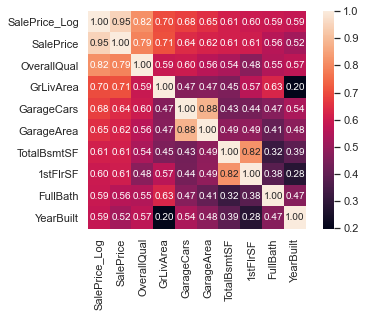

In [176]:
# there are too many variables, so let us focus on the top 10 correlated with the Saleprice

k = 10
cols = corr.nlargest(k, 'SalePrice_Log')['SalePrice_Log'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1)
select_heatmap = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Strong relationship between GarageCars and GarageArea, also 1stFlrSF and TotalBsmtSF

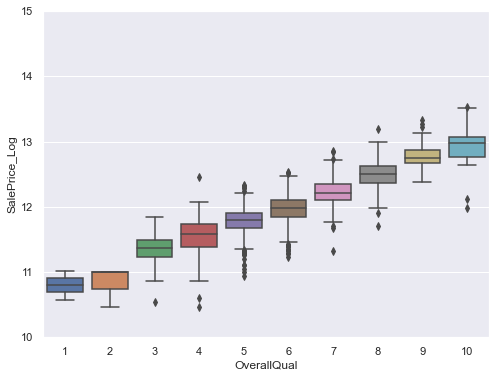

In [177]:
#box plot overallqual/saleprice_Log as there seems to be very high correlation between the 2

var = 'OverallQual'
data = pd.concat([train['SalePrice_Log'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice_Log", data=data)
fig.axis(ymin=10, ymax=15);

C:\Users\Jianglan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


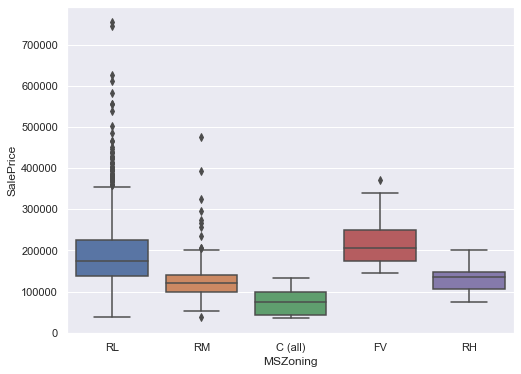

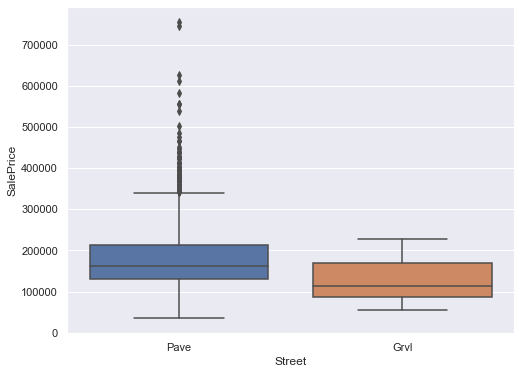

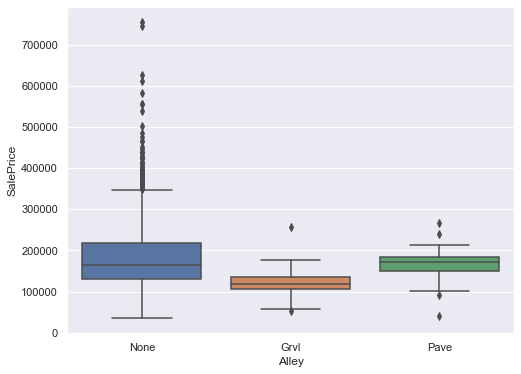

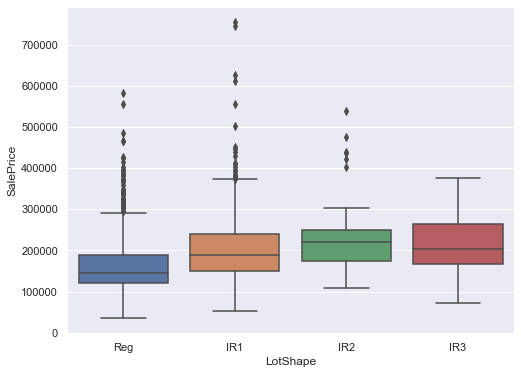

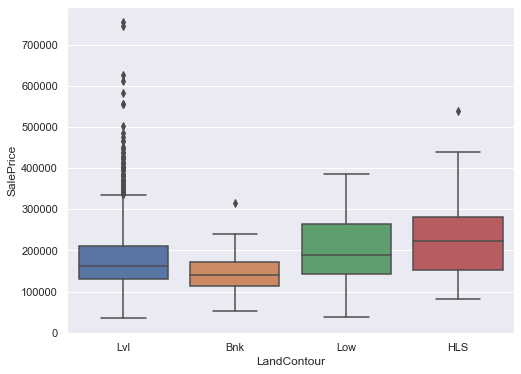

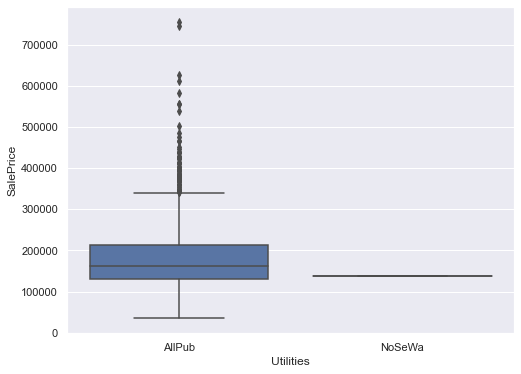

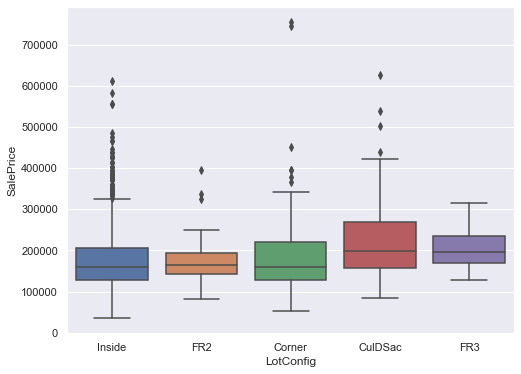

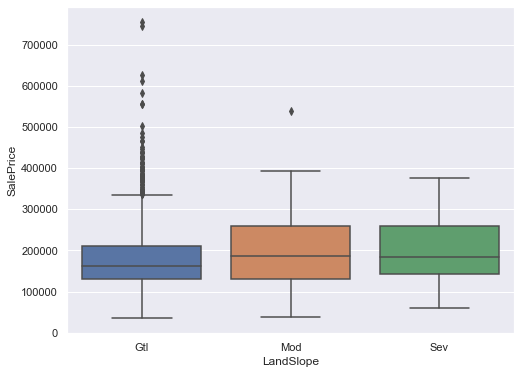

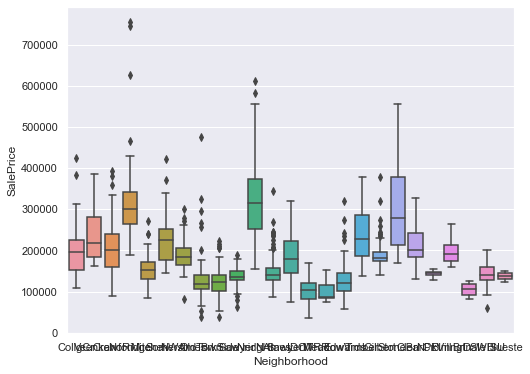

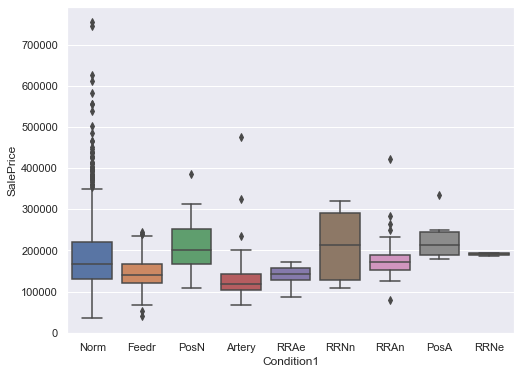

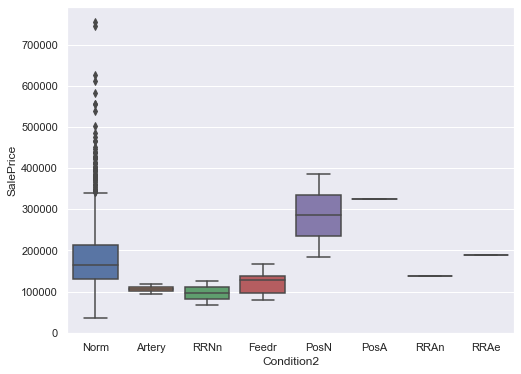

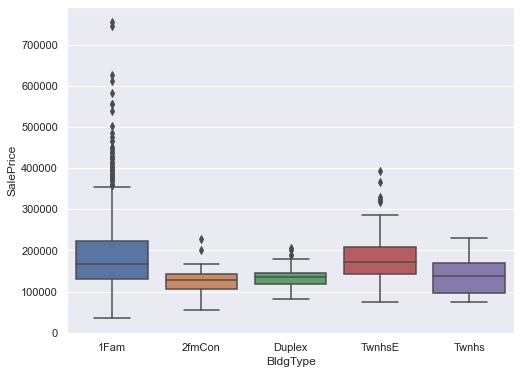

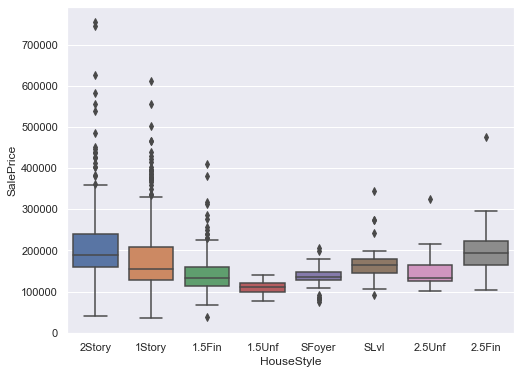

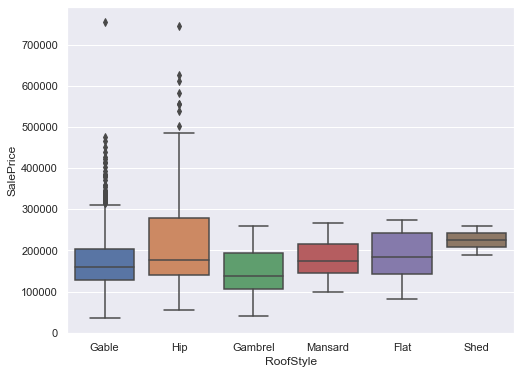

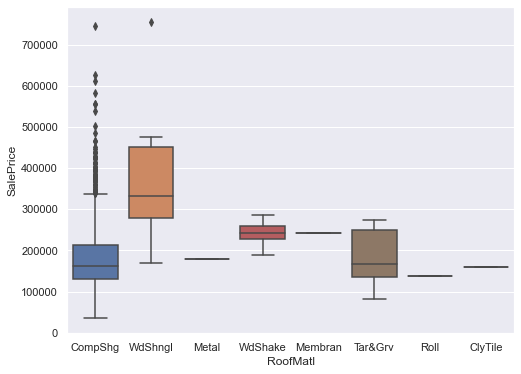

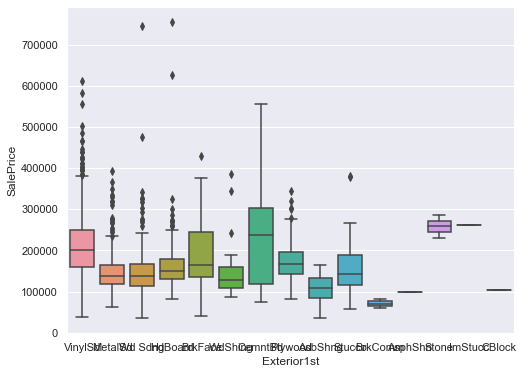

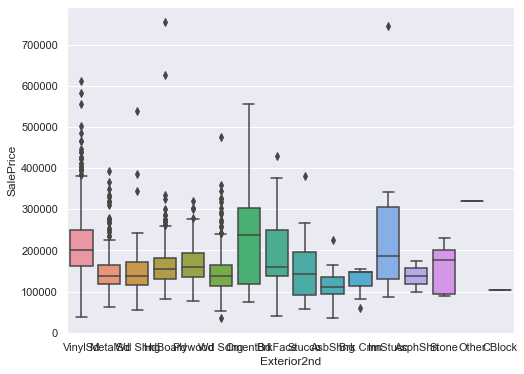

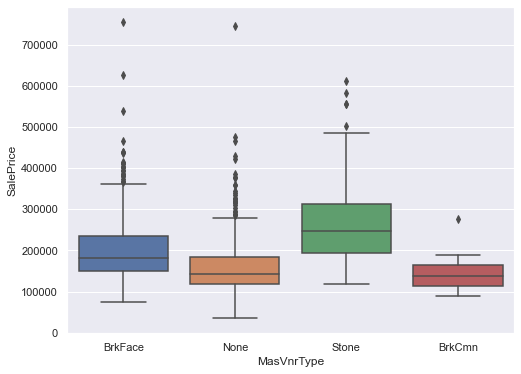

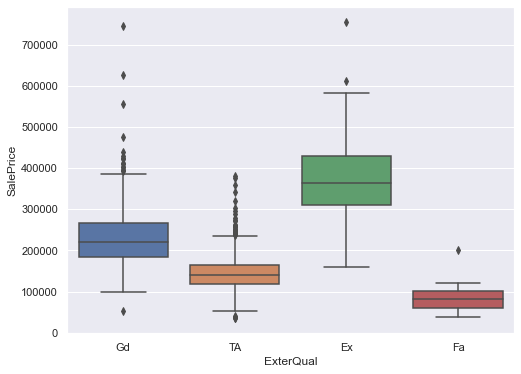

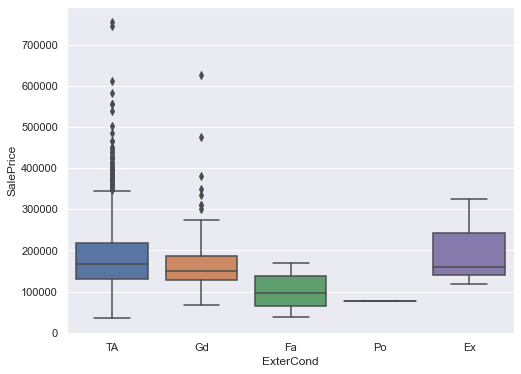

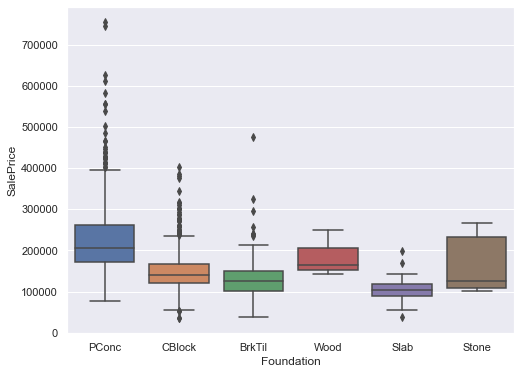

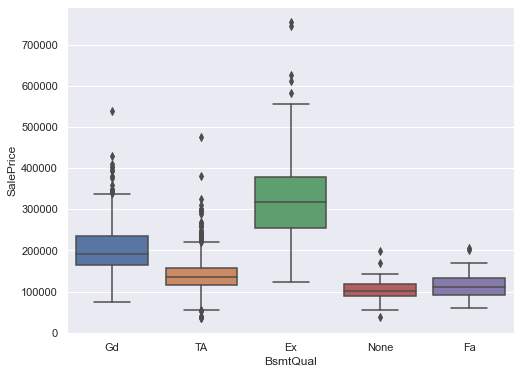

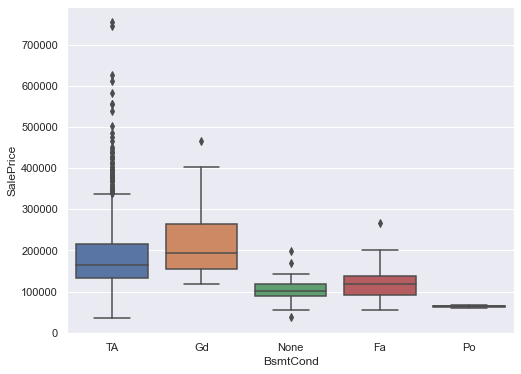

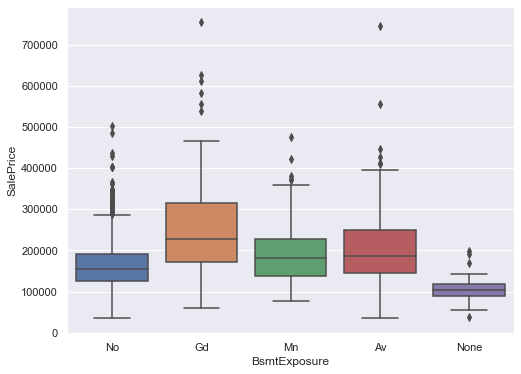

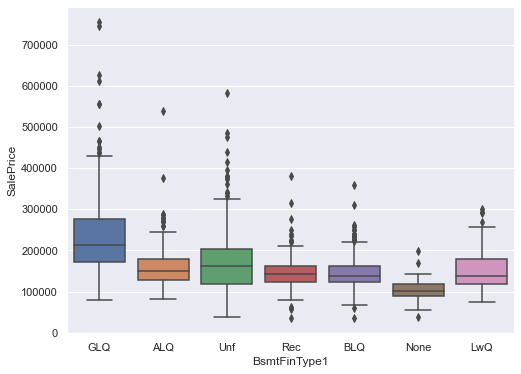

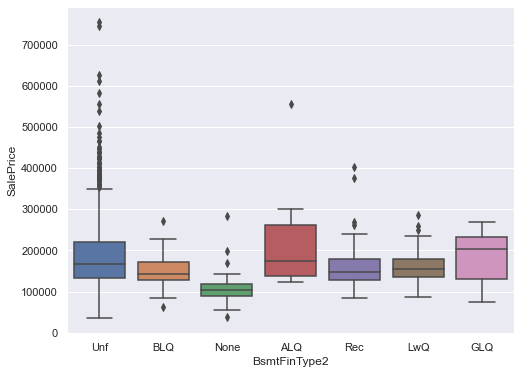

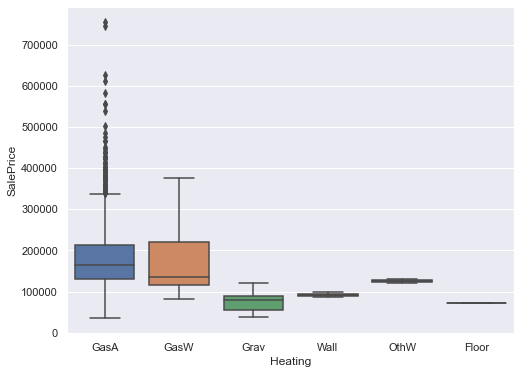

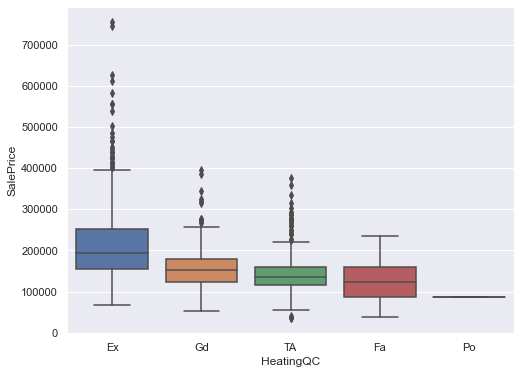

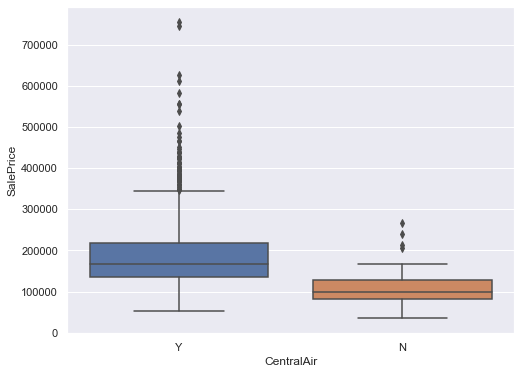

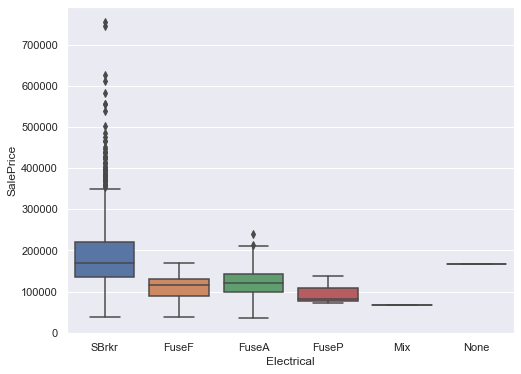

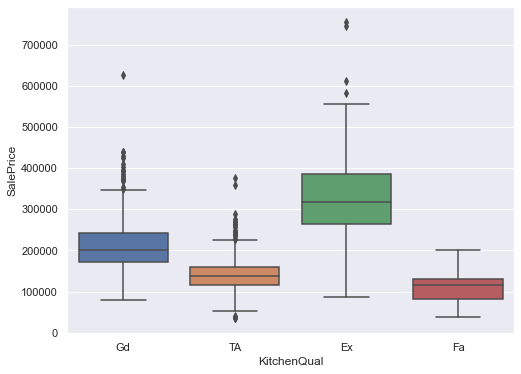

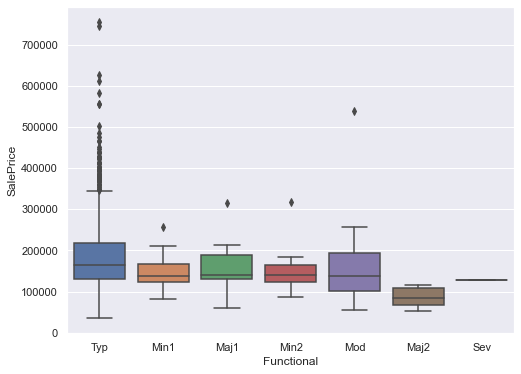

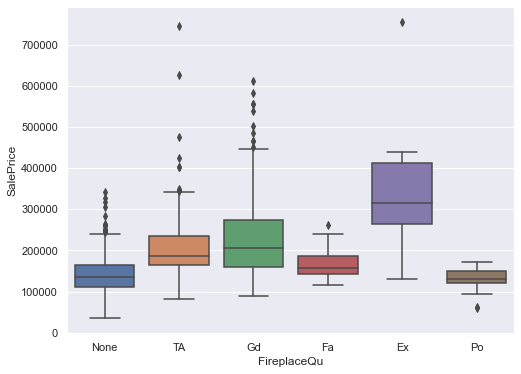

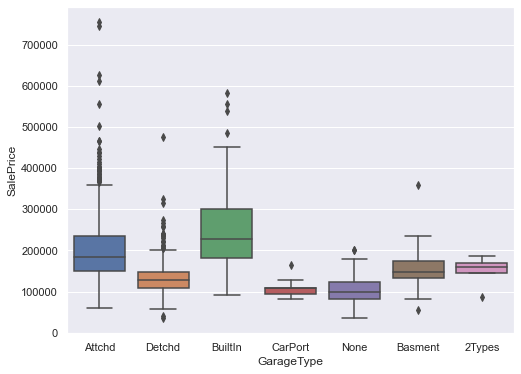

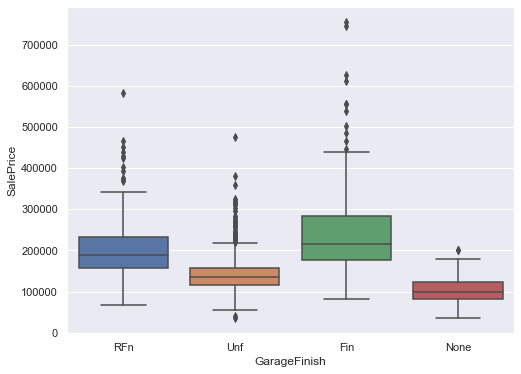

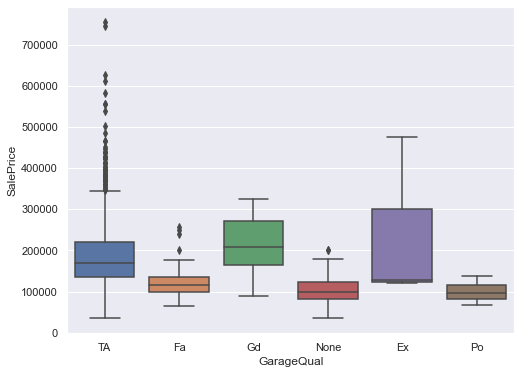

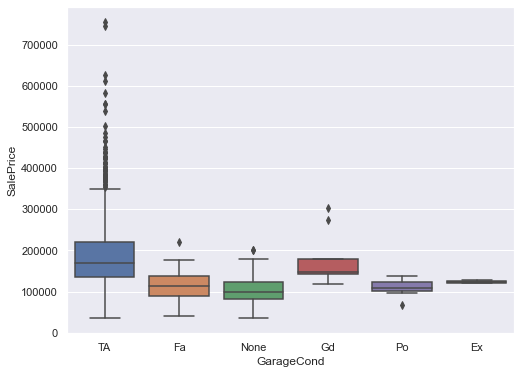

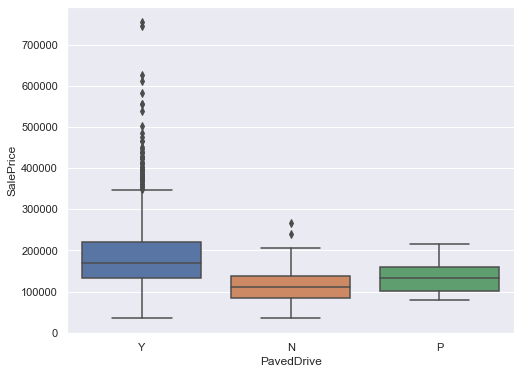

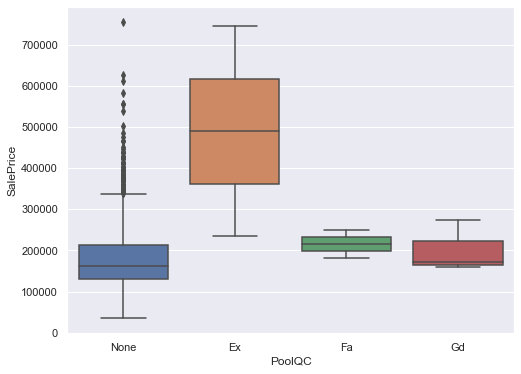

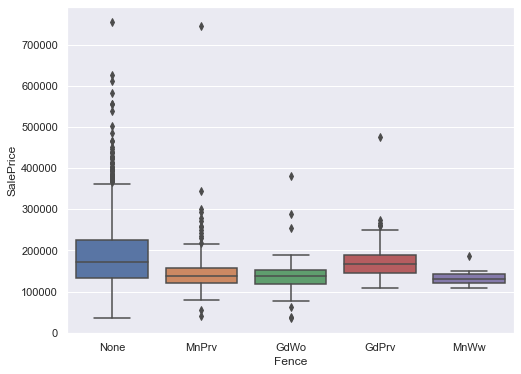

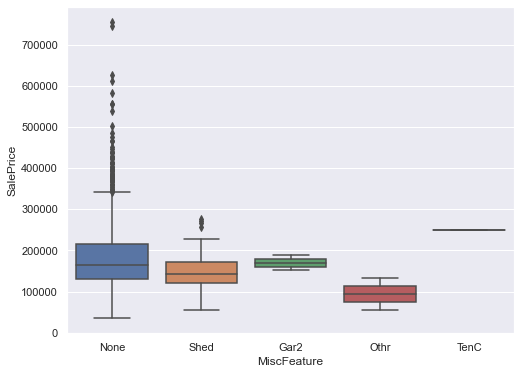

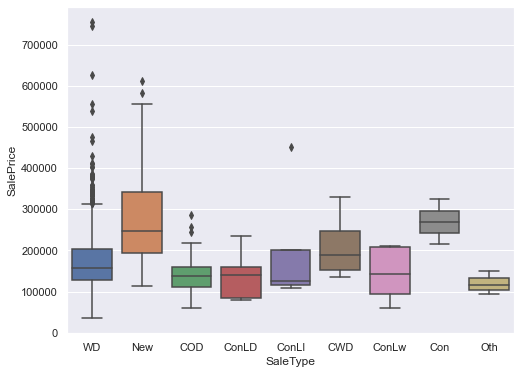

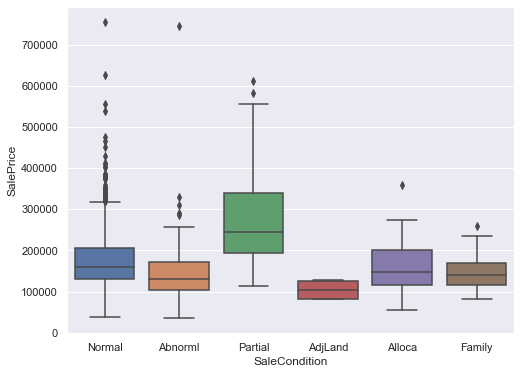

In [178]:
vars_box = feat_cat1
for var in vars_box:
    data = pd.concat([train['SalePrice'], train[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)




Histogram of Data of Housing DataFrame:


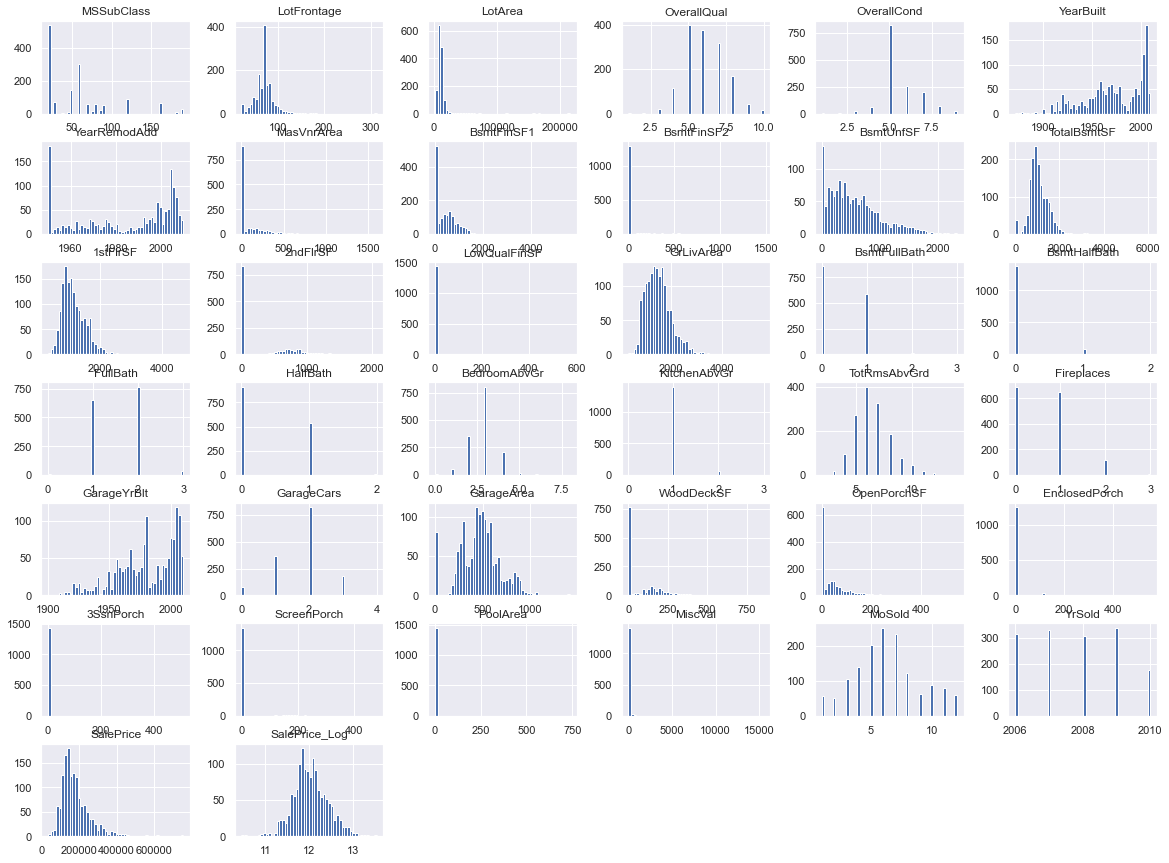

In [179]:
print('\nHistogram of Data of Housing DataFrame:')
feat_num1.hist(bins=50, figsize=(20,15))
plt.show()

# Modeling

In [180]:
cols

Index(['SalePrice_Log', 'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt'],
      dtype='object')

In [181]:
# get training data

y_train=train[cols[0]]
X_train=train[cols[2:len(cols)]]
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)

X_train: (1460, 8)
y_train: (1460,)


In [182]:
X_train

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt
0,7,1710,2,548,856,856,2,2003
1,6,1262,2,460,1262,1262,2,1976
2,7,1786,2,608,920,920,2,2001
3,7,1717,3,642,756,961,1,1915
4,8,2198,3,836,1145,1145,2,2000
...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,1999
1456,6,2073,2,500,1542,2073,2,1978
1457,7,2340,1,252,1152,1188,2,1941
1458,5,1078,1,240,1078,1078,1,1950


In [183]:
y_train

0      12.25
1      12.11
2      12.32
3      11.85
4      12.43
        ... 
1455   12.07
1456   12.25
1457   12.49
1458   11.86
1459   11.90
Name: SalePrice_Log, Length: 1460, dtype: float64

In [184]:
# There are two many variables, selecting linear reg must cause the overfitting problem
# So we selected Ridge Regression, Lasso Regression as regularized methods to fix overfitting
# Random Forest and Gradient Boosting are also included as alternatives

In [185]:
# train ridge model

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge_reg=Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X_train, y_train)
ridge_prediction=ridge_reg.predict(X_train)
ridge_mse=mean_squared_error(y_train,ridge_prediction)
ridge_rmse=np.sqrt(ridge_mse)
ridge_rmse

0.17272332099052448

In [186]:
# ridge model cross validation

from sklearn.model_selection import cross_val_score
scores_ridge=cross_val_score(ridge_reg,X_train,y_train,
                            scoring="neg_mean_squared_error",cv=10)
rmse_scores_ridge=np.sqrt(-scores_ridge)

In [187]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std Dev:",scores.std())
    print("Percentage:",end="")
    print("{0:.2f}".format(scores.mean()/y_train.mean()))

In [188]:
# ridge model result

display_scores(rmse_scores_ridge)

Scores: [0.16369225 0.15142789 0.16176763 0.20808547 0.18052149 0.15401331
 0.15803929 0.15385854 0.26272344 0.15612139]
Mean: 0.17502507104486342
Std Dev: 0.03348224417023672
Percentage:0.01


RMSE is close to Mean scores, Ridge is not overfitting

In [189]:
# Train Lasso model

from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
lasso_prediction=lasso_reg.predict(X_train)
lasso_mse=mean_squared_error(y_train,lasso_prediction)
lasso_rmse=np.sqrt(lasso_mse)
lasso_rmse

0.19842187028758734

In [190]:
# Lasso model cross validation result

scores_lasso=cross_val_score(lasso_reg,X_train,y_train,
                            scoring="neg_mean_squared_error",cv=10)
rmse_scores_lasso=np.sqrt(-scores_lasso)
display_scores(rmse_scores_lasso)

Scores: [0.17387499 0.16968596 0.1757156  0.23763876 0.20437752 0.162922
 0.1930532  0.17441612 0.3183181  0.17396148]
Mean: 0.1983963740646683
Std Dev: 0.04511769053335858
Percentage:0.02


RMSE is close to Mean scores, Lasso is not overfitting

In [191]:
# train Random Forest model

from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(X_train, y_train)
forest_prediction=forest_reg.predict(X_train)
forest_mse=mean_squared_error(y_train,forest_prediction)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

0.06301873813836535

In [192]:
# Random Forest model cross validation result

scores_forest=cross_val_score(forest_reg,X_train,y_train,
                            scoring="neg_mean_squared_error",cv=10)
rmse_scores_forest=np.sqrt(-scores_forest)
display_scores(rmse_scores_forest)

Scores: [0.18400107 0.15452071 0.16353256 0.19396309 0.17931955 0.14355851
 0.15344955 0.14011627 0.16299527 0.16199375]
Mean: 0.16374503114593214
Std Dev: 0.01651235012084927
Percentage:0.01


RMSE is much lower than Mean scores, Random Forest is overfitting

In [193]:
# Try alternative versions of random forests
# Tune model using Grid Search

from sklearn.model_selection import GridSearchCV
param_grid=[
    {'n_estimators':[10, 100, 500], 'max_features':[2, 5, 8]},{'bootstrap':[False]}]
forest_reg_tune=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg_tune, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_features': 2, 'n_estimators': 500}

In [194]:
forest_reg_tune=RandomForestRegressor(n_estimators=500, max_features=2, max_leaf_nodes=16, n_jobs=-1)
forest_reg_tune.fit(X_train, y_train)
forest_tune_prediction=forest_reg_tune.predict(X_train)
forest_tune_mse=mean_squared_error(y_train,forest_tune_prediction)
forest_tune_rmse=np.sqrt(forest_tune_mse)
forest_tune_rmse

0.1643440619544979

In [195]:
scores_forest_tune=cross_val_score(forest_reg_tune,X_train,y_train,
                            scoring="neg_mean_squared_error",cv=10)
rmse_scores_forest_tune=np.sqrt(-scores_forest_tune)
display_scores(rmse_scores_forest_tune)

Scores: [0.18076544 0.16210789 0.17734597 0.19215481 0.20240654 0.15839096
 0.17932309 0.15973706 0.18442979 0.17385683]
Mean: 0.17705183684338388
Std Dev: 0.01351292001244898
Percentage:0.01


RMSE is close to Mean scores, Random Forest after tuning is not overfitting

In [196]:
# Gradient Boosting training

from sklearn.ensemble import GradientBoostingRegressor
gbrt=GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X_train, y_train)
gbrt_prediction=gbrt.predict(X_train)

In [197]:
# Gradient Boosting model cross validation result

scores_gbrt=cross_val_score(gbrt,X_train,y_train,
                            scoring="neg_mean_squared_error",cv=10)
rmse_scores_gbrt=np.sqrt(-scores_gbrt)
display_scores(rmse_scores_gbrt)

Scores: [0.20512357 0.18952055 0.18884362 0.22126863 0.23957479 0.19323461
 0.20518878 0.20179269 0.22434774 0.22356997]
Mean: 0.20924649475890775
Std Dev: 0.016273722278811832
Percentage:0.02


In [198]:
# Try alternative version of Gradient Boosting
# Result is even worse than other models, we need to find the optimal number of trees

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train)
gbrt=GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train_train,y_train_train)
errors=[mean_squared_error(y_train_val, y_train_pred)
       for y_train_pred in gbrt.staged_predict(X_train_val)]
bst_n_estimators=np.argmin(errors)

gbrt_best=GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)
gbrt_best_prediction=gbrt_best.predict(X_train)
gbrt_best_mse=mean_squared_error(y_train,gbrt_best_prediction)
gbrt_best_rmse=np.sqrt(gbrt_best_mse)
gbrt_best_rmse

0.1517022342611125

In [199]:
# Best Gradient Boosting model cross validation result

scores_gbrt_best=cross_val_score(gbrt_best,X_train,y_train,
                            scoring="neg_mean_squared_error",cv=10)
rmse_scores_gbrt_best=np.sqrt(-scores_gbrt_best)
display_scores(rmse_scores_gbrt_best)

Scores: [0.16886565 0.14762874 0.15992533 0.18834584 0.18752307 0.14885103
 0.15886021 0.14770454 0.17249048 0.16462225]
Mean: 0.16448171347336057
Std Dev: 0.014303692961395852
Percentage:0.01


RMSE is close to Mean scores, Gradient Boosting is not overfitting

C:\Users\Jianglan\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jianglan\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jianglan\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

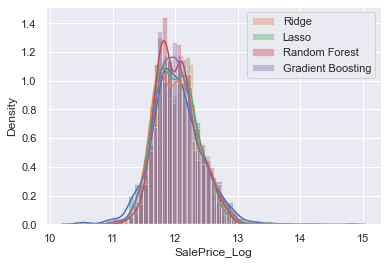

In [200]:
sns.distplot(y_train)
sns.distplot(ridge_prediction, label='Ridge')
sns.distplot(lasso_prediction, label='Lasso')
sns.distplot(forest_tune_prediction, label='Random Forest')
sns.distplot(gbrt_best_prediction, label='Gradient Boosting')
plt.legend()
plt.show()

**Until now we tested six models,the best model is Gradient Boosting with optimal parameters (gbrt_best)** \
**We'll apply Gradient Boosting model to test set**

# Run the Test Set